In [3]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [4]:
df = pd.read_csv('csv/post_release/iPhoneTweets_reaction.csv')

In [5]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1441435385154850817,1441435385154850817,2021-09-24 12:12:31 Eastern Daylight Time,2021-09-24,12:12:31,-400,280413450,_mynameisjoe_,Joe Harvey,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1441435374979588099,1441435374979588099,2021-09-24 12:12:28 Eastern Daylight Time,2021-09-24,12:12:28,-400,117466485,cuzinskeetonher,Warren Peace™🕊,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1441435367408865281,1441435367408865281,2021-09-24 12:12:26 Eastern Daylight Time,2021-09-24,12:12:26,-400,275686563,verge,The Verge,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1441435367245287431,1441419884722749451,2021-09-24 12:12:26 Eastern Daylight Time,2021-09-24,12:12:26,-400,560026877,1972ralph,The Player Ralph V.,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ATTexplore', 'name': 'AT&T E...",NaN,NaN,NaN,NaN
4,4,1441435349482291203,1441435349482291203,2021-09-24 12:12:22 Eastern Daylight Time,2021-09-24,12:12:22,-400,1415643175201345549,jayrajaayar,Jayrajaayar,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9800 non-null   object
 1   id               9801 non-null   object
 2   conversation_id  9801 non-null   object
 3   created_at       9801 non-null   object
 4   date             9801 non-null   object
 5   time             9801 non-null   object
 6   timezone         9801 non-null   object
 7   user_id          9801 non-null   object
 8   username         9801 non-null   object
 9   name             9801 non-null   object
 10  place            14 non-null     object
 11  tweet            9801 non-null   object
 12  language         9801 non-null   object
 13  mentions         9801 non-null   object
 14  urls             9801 non-null   object
 15  photos           9801 non-null   object
 16  replies_count    9801 non-null   object
 17  retweets_count   9801 non-null   

In [7]:
tweets_df = df[['id', 'tweet']]

In [8]:
tweets_df.head()

,id,tweet
0,1441435385154850817,Macro shot of the MagSafe Wallet on the iPhone...
1,1441435374979588099,My iPhone 13 needs to hurry up cuz I don’t wan...
2,1441435367408865281,The iPhone 13 Mini still gets slower MagSafe c...
3,1441435367245287431,@ATTexplore hope i win this new iPhone 13 befo...
4,1441435349482291203,TG 13 iPhone 13 Giveaway!!! https://t.co/QOMG...


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9801 non-null   object
 1   tweet   9801 non-null   object
dtypes: object(2)
memory usage: 153.3+ KB


In [10]:
tweets_df['tweet'] = tweets_df['tweet'].astype(str)

<ipython-input-10-48edb74a62d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['tweet'] = tweets_df['tweet'].astype(str)


In [11]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9801 non-null   object
 1   tweet   9802 non-null   object
dtypes: object(2)
memory usage: 153.3+ KB


In [12]:
tweets_df.isna().sum()

id       1
tweet    0
dtype: int64

In [13]:
tweets_df = tweets_df.dropna()

In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9801 entries, 0 to 9800
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9801 non-null   object
 1   tweet   9801 non-null   object
dtypes: object(2)
memory usage: 229.7+ KB


In [15]:
tweets_df.head()

,id,tweet
0,1441435385154850817,Macro shot of the MagSafe Wallet on the iPhone...
1,1441435374979588099,My iPhone 13 needs to hurry up cuz I don’t wan...
2,1441435367408865281,The iPhone 13 Mini still gets slower MagSafe c...
3,1441435367245287431,@ATTexplore hope i win this new iPhone 13 befo...
4,1441435349482291203,TG 13 iPhone 13 Giveaway!!! https://t.co/QOMG...


In [16]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [17]:
clean_tweets(tweets_df)
tweets_df.head()

,id,tweet,clean_tweet
0,1441435385154850817,Macro shot of the MagSafe Wallet on the iPhone...,"[macro, shot, magsafe, wallet, iphone, pro, ma..."
1,1441435374979588099,My iPhone 13 needs to hurry up cuz I don’t wan...,"[iphone, needs, hurry, cuz, wan, na, facetime]"
2,1441435367408865281,The iPhone 13 Mini still gets slower MagSafe c...,"[iphone, mini, still, gets, slower, magsafe, c..."
3,1441435367245287431,@ATTexplore hope i win this new iPhone 13 befo...,"[attexplore, hope, win, new, iphone, christmas..."
4,1441435349482291203,TG 13 iPhone 13 Giveaway!!! https://t.co/QOMG...,"[tg, iphone, giveaway]"


In [18]:
tweets_df.clean_tweet[4]

['tg', 'iphone', 'giveaway']

In [19]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [20]:
lemmatize_tweet(tweets_df.clean_tweet)
tweets_df

,id,tweet,clean_tweet
0,1441435385154850817,Macro shot of the MagSafe Wallet on the iPhone...,macro shot magsafe wallet iphone pro max super...
1,1441435374979588099,My iPhone 13 needs to hurry up cuz I don’t wan...,iphone need hurry cuz wan na facetime
2,1441435367408865281,The iPhone 13 Mini still gets slower MagSafe c...,iphone mini still get slow magsafe charging speed
3,1441435367245287431,@ATTexplore hope i win this new iPhone 13 befo...,attexplore hope win new iphone christmas time
4,1441435349482291203,TG 13 iPhone 13 Giveaway!!! https://t.co/QOMG...,tg iphone giveaway
...,...,...,...
9796,1442338257312919552,This week on the Worst of the Hi FM Morning Sh...,week bad hi fm morning show podcast calm larry...
9797,1442338233069850625,iFixit: iPhone 13 Pro teardown shows redesigne...,ifixit iphone pro teardown show redesign inter...
9798,1442338219669004293,Apple says it will fix issue with ‘unlock with...,apple say fix issue unlock apple watch feature...
9799,1442338218695925763,Does anyone else find the iPhone 13 Pro uncomf...,anyone else find iphone pro uncomfortably heav...


In [21]:
tweets_df.clean_tweet[4]

'tg iphone giveaway'

# EDA

In [22]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets_df.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

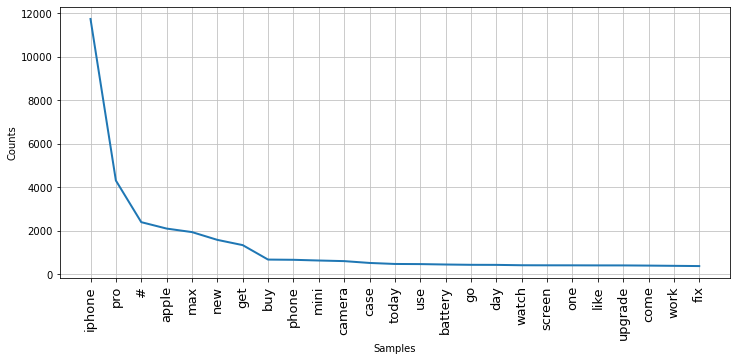

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

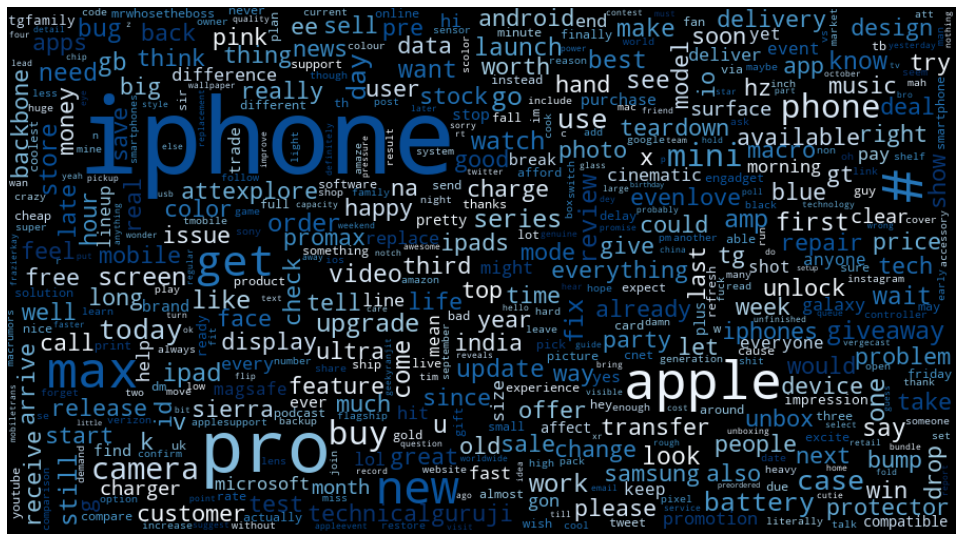

In [24]:

# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Remove 'apple, 'iphone', and '#'

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('apple',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('iphone',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('#',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('phone',''))

In [26]:
finish_cleaning(tweets_df)

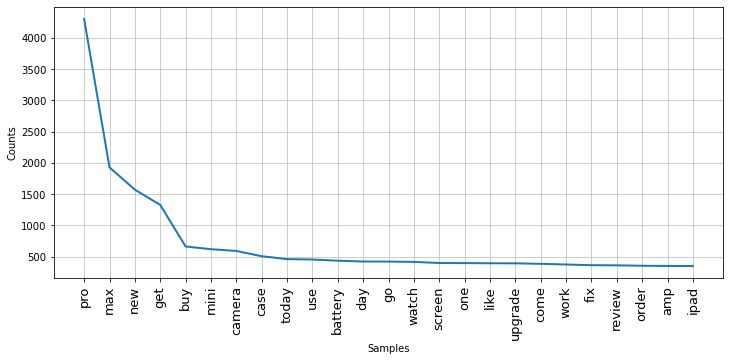

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets_df.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

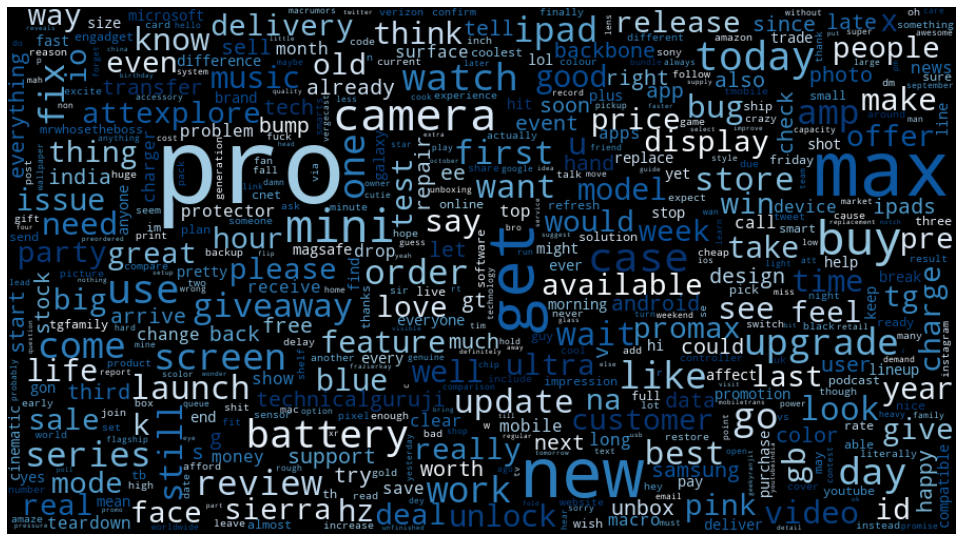

In [28]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
4,pro,4302
5,max,1927
23,new,1571
16,get,1327
49,buy,661
14,mini,618
96,camera,590
215,case,506
76,today,459
87,use,453


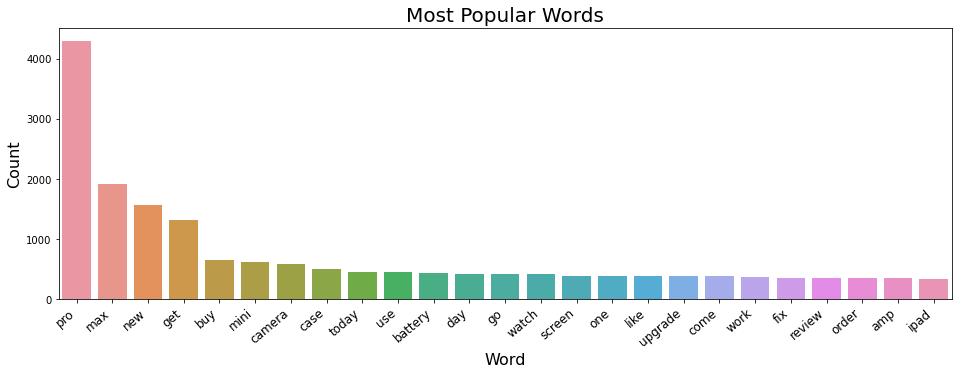

In [30]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

In [31]:
tweets_df.to_csv('iPhoneTweetsInitial_cleaned.csv')